**Assignment 3, Project 2, MSDS 422** (Bank dataset)

**Authors: Kerry Kurcz, Harini Anand, Emily Ekdahl, and Motolani Alimi**

We are asked to fit classification models to data from the Bank Marketing Study.

**PROBLEM:** 
Regarding the management problem, imagine that you are advising the bank about machine learning methods to guide telephone marketing campaigns. Which of the two modeling methods would you recommend and why? And, given the results of your research, which group of banking clients appears to be the best target for direct marketing efforts (similar to those used with previous telephone campaigns)? 


Use three binary explanatory variables relating to client banking history: default, housing, and loan. Predict the binary response variable: Has the client subscribed to a term deposit? Use all banking client observations with complete data for these study variables. Employ two classification methods: (1) logistic regression as described in Chapter 4 of the Géron (2017) textbook and (2) naïve Bayes classification



**Summary of data**

**Categorical Variables**:

job : admin,technician, services, management, retired, blue-collar, unemployed, entrepreneur, housemaid, unknown, self-employed, student

marital : married, single, divorced

education: secondary, tertiary, primary, unknown

default : yes, no

housing : yes, no

loan : yes, no

response : yes, no (target feature)

contact : unknown, cellular, telephone

month : jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec

poutcome: unknown, other, failure, success

**Numerical Variables**:

age

balance

day

duration

campaign

pdays

previous

**DATA PREPARATION, EXPLORATION, AND VISUALIZATION**

**IMPORT LIBRARIES**

In [1]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# initial work with the smaller data set
#from google.colab import files
#data_to_load = files.upload()

# Load the CSV into a DataFrame
bank = pd.read_csv('bank.csv', sep = ';')

# examine the shape of original input data
print(bank.shape)

(4521, 17)


Let's check whether missing data is in the dataset. 

In [3]:
# drop observations with missing data, if any
bank.dropna()

# examine the shape of input data after dropping missing data
print(bank.shape)

# there doesn't appear to be any missing data

(4521, 17)


In [4]:
#look at the list of column names, note that y is the response
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

In [5]:
# Examine the dataset
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**Predictor variables relating to client banking history**:

-Default: Has credit in default? (yes/no)

-Housing: Has housing loan? (yes/no)

-Loan: Has personal loan? (yes/no)

**Target variable**:

Response: Has the client subscribed to a term deposit? (yes/no)

In [6]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
bank.skew(axis=0)

age         0.699501
balance     6.596431
day         0.094627
duration    2.772420
campaign    4.743914
pdays       2.717071
previous    5.875259
dtype: float64

In [8]:
bank.kurtosis(axis=0)

age          0.348775
balance     88.390332
day         -1.039531
duration    12.530050
campaign    37.168920
pdays        7.957128
previous    51.995212
dtype: float64

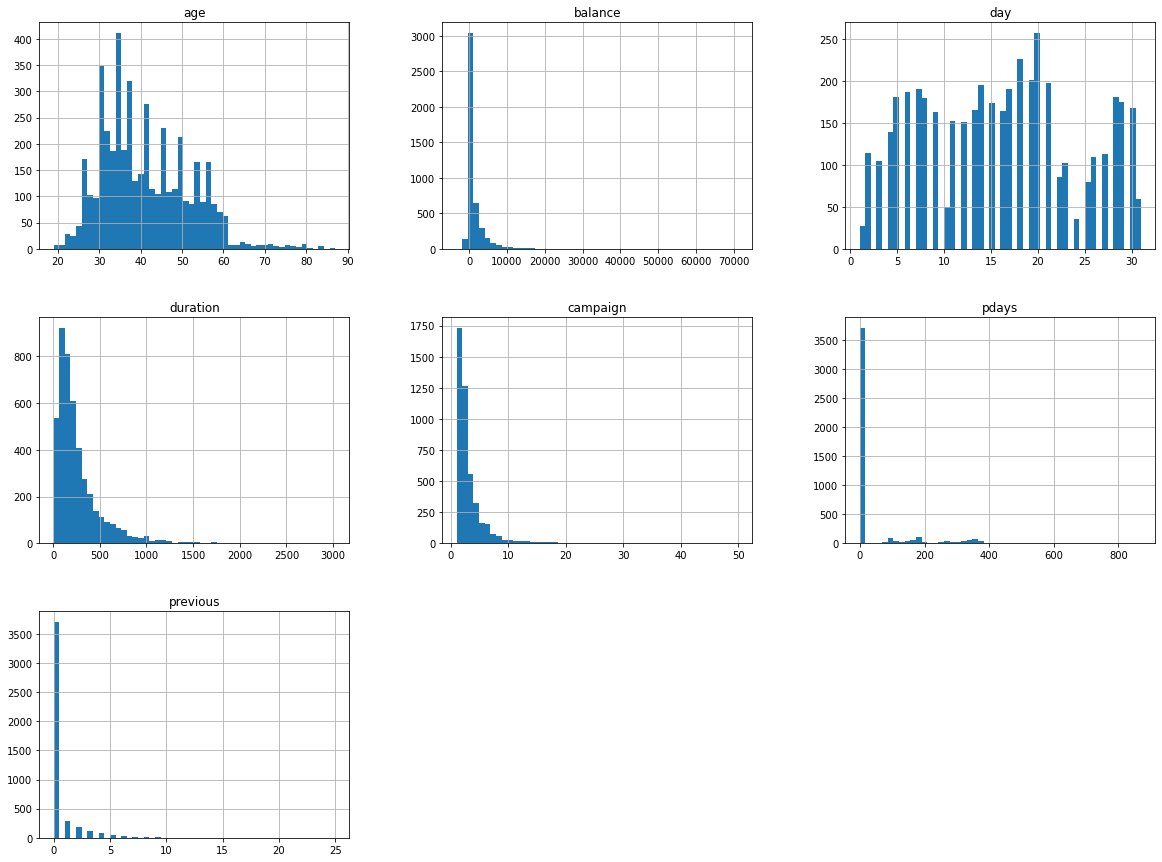

In [9]:
# Graph the histograms 
bank.hist(bins=50, figsize=(20,15))
plt.show()

In [1]:
f, axes = plt.subplots(nrows=4,ncols=2,figsize=(17,15))
ax.set_title('style: {!r}'.format(sty), color='C0')

a0 = sns.boxplot(x='age',ax=axes[0,0],data=bank)
a0.set_title('age')
a1 = sns.boxplot(x='balance',ax=axes[0,1],data=bank)
a1.set_title('balance')
a2 = sns.boxplot(x='duration',ax=axes[1,0],data=bank)
a2.set_title('duration')
a3 = sns.boxplot(x='campaign',ax=axes[1,1],data=bank)
a3.set_title('campaign')
a4 = sns.boxplot(x='pdays',ax=axes[2,0],data=bank)
a4.set_title('pdays')
a5 = sns.boxplot(x='previous',ax=axes[2,1],data=bank)
a5.set_title('previous')
a6 = sns.boxplot(x='day',ax=axes[3,0],data=bank)
a6.set_title('day')

NameError: name 'sns' is not defined

In [11]:
# Transform data
# Create the dummy (Dichotomous) variables

print([[bank.columns],[bank.dtypes]])
print(pd.DataFrame.head(bank))

bank1 = pd.get_dummies(bank)
print([[bank1.columns],[bank1.dtypes]])

[[Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'response'],
      dtype='object')], [age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
response     object
dtype: object]]
   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        

<AxesSubplot:>

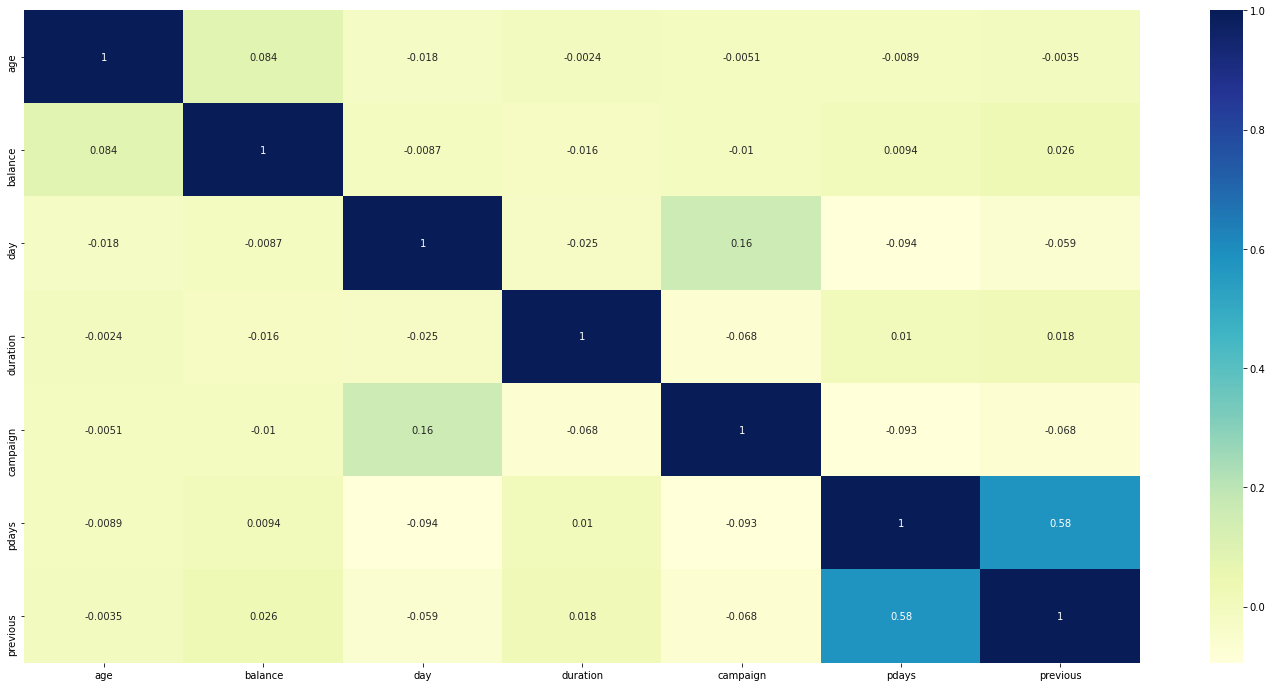

In [12]:
# # Heatmap based on correlations among the variables
plt.figure(figsize=(25,12))
sns.heatmap(bank.corr(),annot=True,cmap="YlGnBu", )

Text(0.5, 1.0, 'marital')

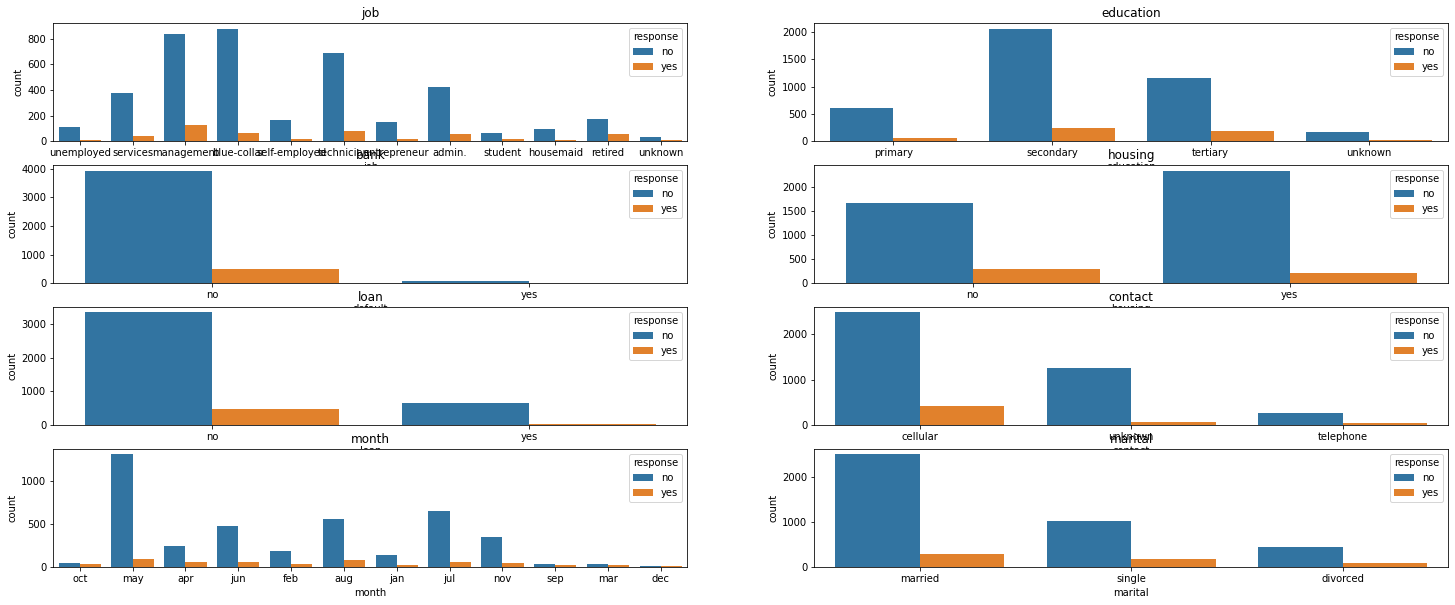

In [13]:
# The four binary (dichotomous) variables
f, axes = plt.subplots(nrows=4,ncols=2,figsize=(25,10))

a0 = sns.countplot(x='job',hue='response',ax=axes[0,0],data=bank)
a0.set_title('job')
a1 = sns.countplot(x='education',hue='response',ax=axes[0,1],data=bank)
a1.set_title('education')
a2 = sns.countplot(x='default',hue='response',ax=axes[1,0],data=bank)
a2.set_title('bank')
a3 = sns.countplot(x='housing',hue='response',ax=axes[1,1],data=bank)
a3.set_title('housing')

a4 = sns.countplot(x='loan',hue='response',ax=axes[2,0],data=bank)
a4.set_title('loan')
a5 = sns.countplot(x='contact',hue='response',ax=axes[2,1],data=bank)
a5.set_title('contact')
a6 = sns.countplot(x='month',hue='response',ax=axes[3,0],data=bank)
a6.set_title('month')
a7 = sns.countplot(x='marital',hue='response',ax=axes[3,1],data=bank)
a7.set_title('marital')

**Descriptive Statistics:**

Crosstabs and descriptive statistics


In [14]:
# Crosstabs for initial analysis
a = pd.crosstab(bank1.response_yes,
                bank1.housing_yes,
                rownames=['Response'], colnames=['Housing'])
                
b = pd.crosstab(bank1.response_yes,
                bank1.loan_yes,
                rownames=['Response'], colnames=['Loan'])
                
c = pd.crosstab(bank1.response_yes,
                bank1.default_yes,
                rownames=['Response'], colnames=['Default'])

print(a,"\n")
print(b,"\n")
print(c,"\n")
        
def myor(a):
        myv=round((a.loc[1,1]/a.loc[0,1])/(a.loc[1,0]/a.loc[0,0]),3)
        logmyv = np.log(myv)
        se = np.sqrt(1/(a.loc[1,1]+1/a.loc[0,1]+a.loc[1,0]+a.loc[0,0]))
        lower = round(np.exp(logmyv-1.96*se),3)
        upper = round(np.exp(logmyv+1.96*se),3)
        return [myv, lower, upper]
                
print("Odds for Response Yes for Each Variable with 95% CI")
print("If housing = yes, odds for response = yes:", myor(a))
print("If loan = yes, odds for response = yes:", myor(b))
print("If default = yes, odds for response = yes:", myor(c))    
                
print(bank.groupby('response').mean())

Housing      0     1
Response            
0         1661  2339
1          301   220 

Loan         0    1
Response           
0         3352  648
1          478   43 

Default      0   1
Response          
0         3933  67
1          512   9 

Odds for Response Yes for Each Variable with 95% CI
If housing = yes, odds for response = yes: [0.519, 0.498, 0.541]
If loan = yes, odds for response = yes: [0.465, 0.451, 0.48]
If default = yes, odds for response = yes: [1.032, 1.002, 1.063]
                age      balance        day    duration  campaign      pdays  \
response                                                                       
no        40.998000  1403.211750  15.948750  226.347500  2.862250  36.006000   
yes       42.491363  1571.955854  15.658349  552.742802  2.266795  68.639155   

          previous  
response            
no        0.471250  
yes       1.090211  


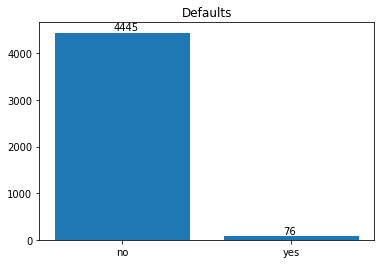

In [15]:
Default = bank['default'].value_counts()
y_pos = np.arange(len(Default))
plt.bar(y_pos, Default)
plt.xticks(y_pos, Default.index)
plt.title('Defaults')

for i in range(len(Default.index)):
    plt.text(x = y_pos[i]-0.05, y = Default[i]+50, s = Default[i])


First we consider the explanatory variable, default. There are very few defaults in this data set.

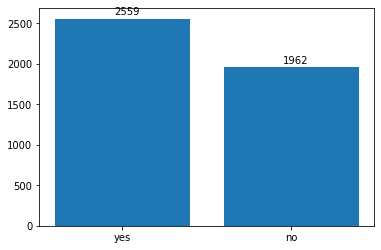

In [16]:
Housing = bank['housing'].value_counts()
y_pos = np.arange(len(Housing))
plt.bar(y_pos, Housing)
plt.xticks(y_pos, Housing.index)

for i in range(len(Housing.index)):
    plt.text(x = y_pos[i]-0.05, y = Housing[i]+50, s = Housing[i])



Home ownership, one of the explanatory variables, is relatively evenly distributed in this dataset. In this particular sample, roughly 43.4% of people do not own a home while roughly 56.6% do own a home.

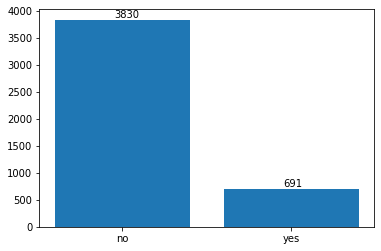

In [17]:
Loan = bank['loan'].value_counts()
y_pos = np.arange(len(Loan))
plt.bar(y_pos, Loan)
plt.xticks(y_pos, Loan.index)

for i in range(len(Loan.index)):
    plt.text(x = y_pos[i]-0.05, y = Loan[i]+50, s = Loan[i])
    

Next, we consider the explanatory variable loan. Roughly 15% of the dataset has a loan.

Text(0.5, 1.0, 'Age and Response Type')

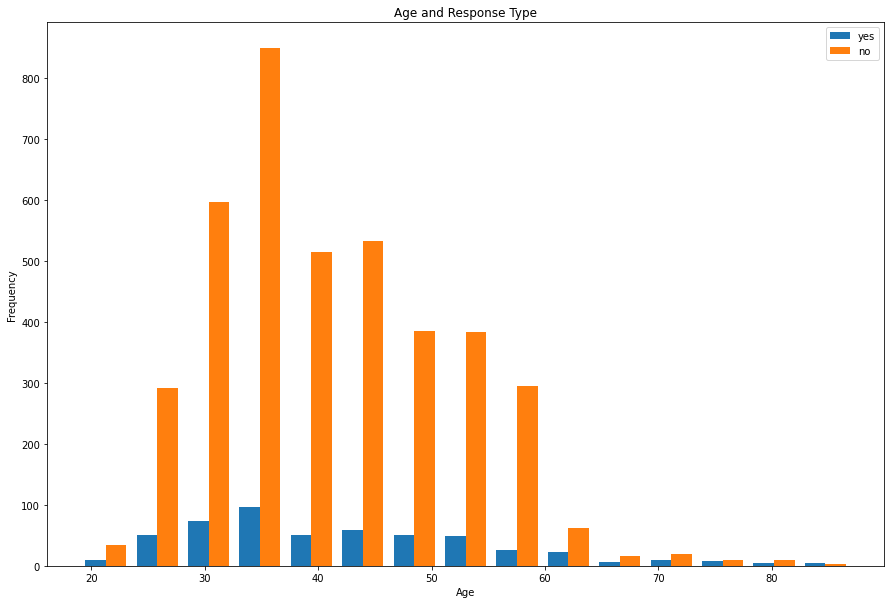

In [18]:
# age versus response
x1 = list(bank[bank['response'] == 'yes']['age'])
x2 = list(bank[bank['response'] == 'no']['age'])

plt.figure(figsize=(15,10))
plt.hist([x1, x2], label=['yes','no'], bins=15)
plt.legend()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age and Response Type')

# very few people have a yes response and they vary across age groups

In [19]:
age_response = bank.groupby(['response', 'age'])['response'].count()
age_response

response  age
no        19      2
          20      2
          21      6
          22      6
          23     18
                 ..
yes       79      2
          80      2
          83      2
          84      1
          87      1
Name: response, Length: 127, dtype: int64

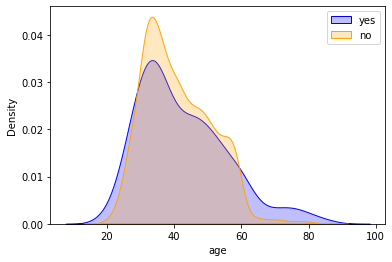

In [20]:
sns.kdeplot(bank[bank['response'] == 'yes']['age'], shade=True, color="blue")
sns.kdeplot(bank[bank['response'] == 'no']['age'], shade=True, color="orange")
plt.legend(['yes','no'])

# this density plot shows the two response types by age and percent
# there is a higher peak at age 35 for no respondents and at age 65 for yes respondents

In [21]:
# marital versus response
marital_response = bank.groupby(['response', 'marital'])['response'].count()
marital_response

response  marital 
no        divorced     451
          married     2520
          single      1029
yes       divorced      77
          married      277
          single       167
Name: response, dtype: int64

In [22]:
yes = marital_response['yes'].sum()
no = marital_response['no'].sum()
total = yes+no

In [23]:
divorced = bank[bank['marital'] == 'divorced'].groupby(['response'])['response'].count()
married = bank[bank['marital'] == 'married'].groupby(['response'])['response'].count()
single = bank[bank['marital'] == 'single'].groupby(['response'])['response'].count()

In [24]:
married_df = pd.DataFrame({'divorced':divorced, 'married':married, 'single':single})
married_df

,divorced,married,single
response,,,
no,451,2520,1029
yes,77,277,167


In [25]:
# From raw value to percentage
totals = [i+j+k for i,j,k in zip(married_df['divorced'], married_df['married'], married_df['single'])]
divorce = [i / j * 100 for i,j in zip(married_df['divorced'], totals)]
marri = [i / j * 100 for i,j in zip(married_df['married'], totals)]
singl = [i / j * 100 for i,j in zip(married_df['single'], totals)]

Text(0.5, 1.0, 'Distribution of Martial Status by Response')

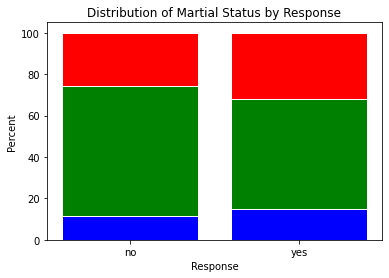

In [26]:
plt.bar([0,1], divorce, color='blue', edgecolor='white')
plt.bar([0,1], marri, bottom=divorce, color='green', edgecolor='white')
plt.bar([0,1], singl, bottom=[i+j for i,j in zip(divorce, marri)], color='red', edgecolor='white')

plt.xticks([0,1], married_df.index)
plt.xlabel("Response")
plt.ylabel("Percent")
plt.title("Distribution of Martial Status by Response")

# this chart illustrates the different break down by marital status and response to determine if there might be a
# significant difference between the two

In [27]:
# education versus response
x1 = list(bank[bank['response'] == 'yes']['education'])
x2 = list(bank[bank['response'] == 'no']['education'])

Text(0.5, 1.0, 'Education and Response Type = Yes')

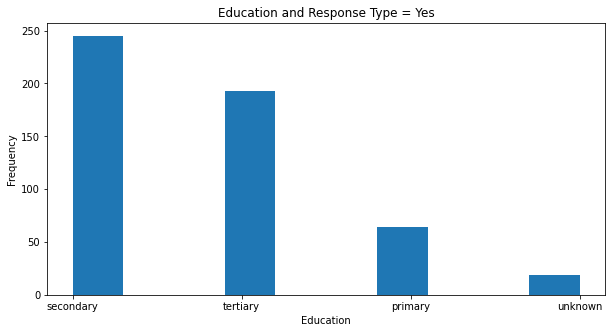

In [28]:
plt.figure(figsize=(10,5))
plt.hist(x1)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education and Response Type = Yes')

# the most likely yes respondents have a secondary education

Text(0.5, 1.0, 'Education and Response Type = No')

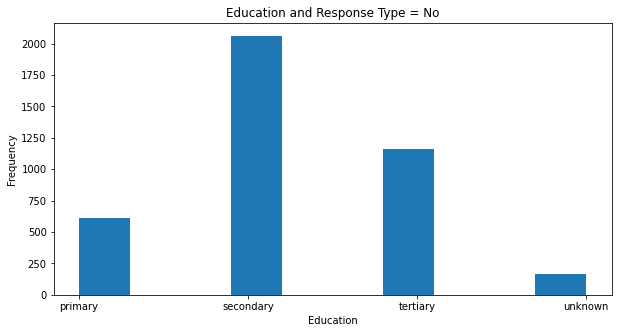

In [29]:
plt.figure(figsize=(10,5))
plt.hist(x2)
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Education and Response Type = No')

# but this fact is also true for no respondents

<AxesSubplot:xlabel='balance', ylabel='response'>

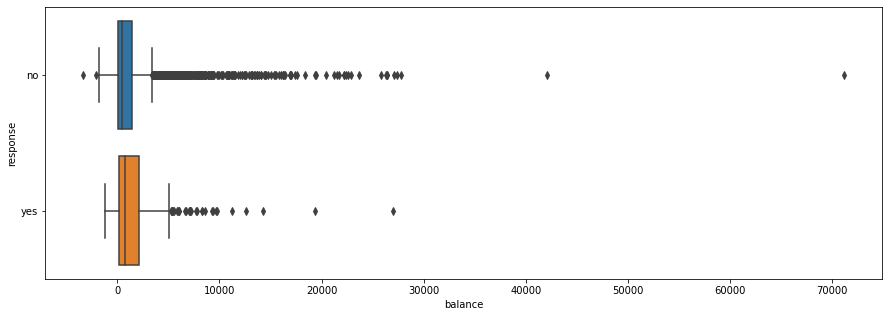

In [30]:
# account balance versus response
plt.figure(figsize=(15,5))
sns.boxplot(x=bank["balance"], y=bank["response"])

# the means for yes and no respondents are about the same regardless of the account balance
# though, there are clear outliers for no respondents

<AxesSubplot:xlabel='duration', ylabel='response'>

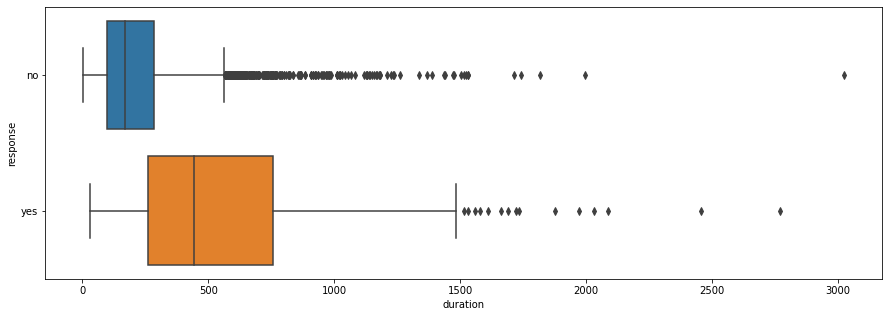

In [31]:
# call duration versus response
plt.figure(figsize=(15,5))
sns.boxplot(x=bank["duration"], y=bank["response"])

# there appears to be a fairly signifant difference between yes and no responses when looking at call duration
# the longer a customer is on the phone may be a good sign

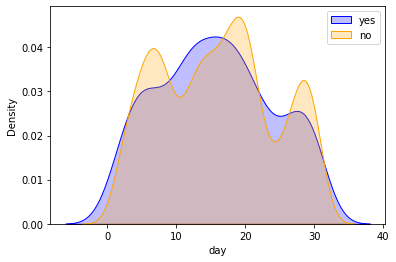

In [32]:
# the particular day versus response
sns.kdeplot(bank[bank['response'] == 'yes']['day'], shade=True, color="blue")
sns.kdeplot(bank[bank['response'] == 'no']['day'], shade=True, color="orange")
plt.legend(['yes','no'])

# the 10th and 24th days of the month appear to be the least called when it comes to no responses
# the most yes responses occur around the 15th day of the month, which is when many people get paid

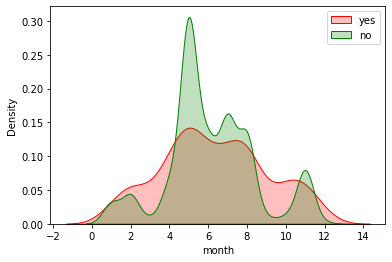

In [33]:
# the particular month versus response
convert_month = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6,
                 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
month = bank['month'].map(convert_month)

sns.kdeplot(month[bank['response'] == 'yes'], shade=True, color="red")
sns.kdeplot(month[bank['response'] == 'no'], shade=True, color="green")
plt.legend(['yes','no'])

# the "no" density plot is very bumpy, but peaks slightly at the same month (May) as yes responses

Text(0.5, 1.0, 'Distribution of Contact Status by Response')

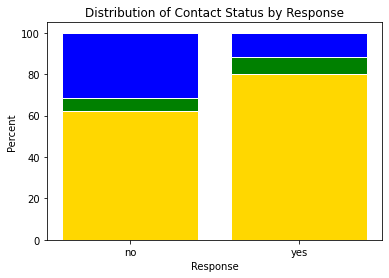

In [34]:
# phone contact versus response
cell = bank[bank['contact'] == 'cellular'].groupby(['response'])['response'].count()
tele = bank[bank['contact'] == 'telephone'].groupby(['response'])['response'].count()
unk = bank[bank['contact'] == 'unknown'].groupby(['response'])['response'].count()
cell_df = pd.DataFrame({'cellular':cell, 'telephone':tele, 'unknown':unk})

# From raw value to percentage
totals = [i+j+k for i,j,k in zip(cell_df['cellular'], cell_df['telephone'], cell_df['unknown'])]
cel = [i / j * 100 for i,j in zip(cell_df['cellular'], totals)]
tel = [i / j * 100 for i,j in zip(cell_df['telephone'], totals)]
unk = [i / j * 100 for i,j in zip(cell_df['unknown'], totals)]

plt.bar([0,1], cel, color='gold', edgecolor='white')
plt.bar([0,1], tel, bottom=cel, color='green', edgecolor='white')
plt.bar([0,1], unk, bottom=[i+j for i,j in zip(cel, tel)], color='blue', edgecolor='white')

plt.xticks([0,1], cell_df.index)
plt.xlabel("Response")
plt.ylabel("Percent")
plt.title("Distribution of Contact Status by Response")

# this bar chart shows more yes responses come from folks on cellphones

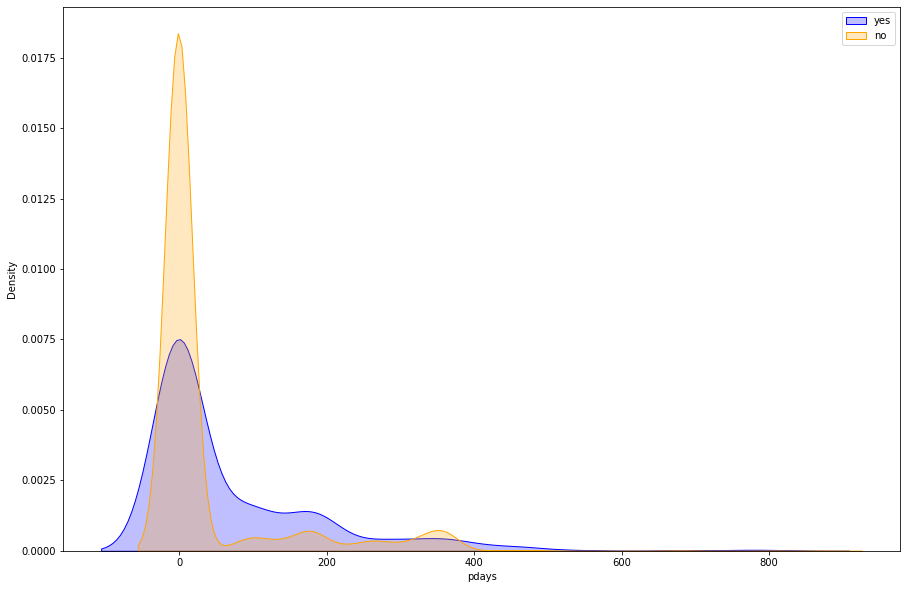

In [35]:
# pdays versus response
plt.figure(figsize=(15,10))
sns.kdeplot(bank[bank['response'] == 'yes']['pdays'], shade=True, color="blue")
sns.kdeplot(bank[bank['response'] == 'no']['pdays'], shade=True, color="orange")
plt.legend(['yes','no'])

# the yes response is very high around -1, 0, and 1, which means the customer was either never contacted, 
# contacted only just today, or contacted yesterday, respectively

In [36]:
# What does the average 'yes' person look like?
pd.options.display.float_format = '{:,.2f}'.format
bank.groupby('response').mean() # Note higher balance and duration in 'yes'

,age,balance,day,duration,campaign,pdays,previous
response,,,,,,,
no,41.00,"1,403.21",15.95,226.35,2.86,36.01,0.47
yes,42.49,"1,571.96",15.66,552.74,2.27,68.64,1.09


In [37]:
# break-down of loan for targeted customers
loans = bank[bank['response'] == 'yes']['loan'].value_counts()
loans

no     478
yes     43
Name: loan, dtype: int64

In [38]:
def get_pct_interest( df ):
    return 'Interested: {:.2f}'.format( ( df['yes'] / df['no'] ) * 100 )

In [39]:
get_pct_interest(loans)

'Interested: 9.00'

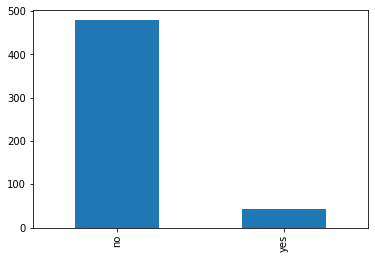

In [40]:
loans.plot(kind="bar")
plt.show()

In [41]:
# break-down of default for targeted customers
defaults = bank[bank['response'] == 'yes']['default'].value_counts()
defaults

no     512
yes      9
Name: default, dtype: int64

In [42]:
get_pct_interest(defaults)

'Interested: 1.76'

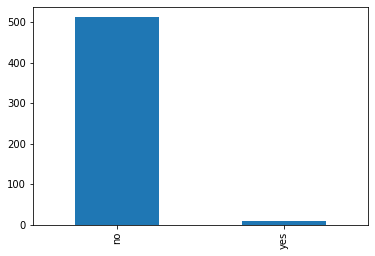

In [43]:
defaults.plot(kind='bar')
plt.show()

In [56]:
# Convert yes/no string to binary
# mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

# Suggested baseline variables
# define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

# define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

# define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

# define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [61]:
# Prepare Data for model
# Let's remove default, as this will simplifiy our model and it seems to have little impact on client interest.
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want
model_data = np.array([np.array(default), np.array(housing), np.array(loan),
    np.array(response)]).T # Prepare Data for Model

model_data = pd.DataFrame(model_data)
# examine the shape of model_data, which we will use in subsequent modeling
print(model_data.shape)

model_data.info()


(4521, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       4521 non-null   int64
 1   1       4521 non-null   int64
 2   2       4521 non-null   int64
 3   3       4521 non-null   int64
dtypes: int64(4)
memory usage: 141.4 KB


Review research design and modeling methods

Predict the binary response variable: Has the client subscribed to a term deposit. Use all banking client observations with complete data for these study variables. Employ two classification methods: (1) logistic regression as described in Chapter 4 of the Géron (2017) textbook and (2) naïve Bayes classification.

In [46]:
 # cross-validation scoring code adapted from Scikit Learn documentation
from sklearn.metrics import roc_auc_score

In [47]:
# specify the set of classifiers being evaluated
# import necessary Packages

from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression

classifier_names = ["Naive_Bayes", "Logistic_Regression"]

classifiers = [BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False), 
               LogisticRegression(solver = 'lbfgs')]

# dimensions of the additive model X input and y response
print('\nData dimensions:', model_data.shape)


Data dimensions: (4521, 4)


In [48]:
# --------------------------------------------------------
# specify the k-fold cross-validation design
from sklearn.model_selection import KFold

In [49]:
# ten-fold cross-validation employed here
N_FOLDS = 10

# set up numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(classifier_names)))

In [50]:
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# check the splitting process by looking at fold observation counts
index_for_fold = 0  # fold count initialized

for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
#   note that 0:model_data.shape[1]-1 slices for explanatory variables
#   and model_data.shape[1]-1 is the index for the response variable    
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]   

    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)

    index_for_method = 0  # initialize
    for name, clf in zip(classifier_names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        clf.fit(X_train, y_train)  # fit on the train set for this fold
        # evaluate on the test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = classifier_names

print('\n----------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      '\nMethod                 Area under ROC Curve', sep = '')     
print(cv_results_df.mean())


Fold index: 0 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4068, 3)
X_test: (453, 3)
y_train: (4068,)
y_test: (453,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.5878522062732588

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()
Area under ROC curve: 0.5878522062732588

Fold index: 1 ------------------------------------------

Shape of input data for this fold: 
Data Set: (Observations, Variables)
X_train: (4069, 3)
X_test: (452, 3)
y_train: (4069,)
y_test: (452,)

Classifier evaluation for: Naive_Bayes
  Scikit Learn method: BernoulliNB(binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)
Area under ROC curve: 0.633727778967659

Classifier evaluation for: Logistic_Regression
  Scikit Learn method: LogisticRegression()
Area under ROC curve: 0.633727778967

/Users/harini-mac/Desktop/Northwestern University/MSDS-422/my_env/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [51]:
# Obtain the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, f1_score


# Get the predictions and scores for X_test
y_pred = clf.predict(X_test)
y_test_predict = clf.predict_proba(X_test)

y_test_predict_proba_1= y_test_predict [:,1]

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[394   0]
 [ 58   0]]


In [52]:
# obtain the accuracy metrics using the predictions

[fpr, tpr, thr] = roc_curve(y_test, y_test_predict_proba_1)
print('Testing Accuracy:')
print(" Accuracy: %0.4f" % accuracy_score(y_test, y_pred))
print(" Log loss: %0.4f" % log_loss(y_test, y_test_predict))
print(" F1 score: %0.4f" % f1_score(y_test, y_pred))
print(" auc: %0.4f" % auc(fpr, tpr))

print(" Precision: %f "%precision_score(y_test, y_pred))
print(" Recall: %f "%recall_score(y_test, y_pred))

Testing Accuracy:
 Accuracy: 0.8717
 Log loss: 0.3812
 F1 score: 0.0000
 auc: 0.5768
 Precision: 0.000000 
 Recall: 0.000000 


/Users/harini-mac/Desktop/Northwestern University/MSDS-422/my_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# Save the cross-validation results.
cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = classifier_names
with open("cv-results.txt", "w") as text_file:
    text_file.write('\nResults from '+ str(N_FOLDS) + '-fold cross-validation\n'+
                     '\nMethod Area under ROC Curve:\n'+ 
                     str(cv_results_df))

RESULTS

In [54]:
pd.options.display.float_format = '{:,.6f}'.format
cv_results_df.mean() # same as the results in the display above

Naive_Bayes           0.611060
Logistic_Regression   0.611733
dtype: float64